In [1]:
import json
import glob
import matplotlib.pylab as plt

In [2]:
result_dir = '/disk/data/models/results/tgt/'

In [3]:
files = glob.glob(result_dir+'*')
print(files)

# ko_fname = '/disk/data/models/results/tgt/ko_for_ko_with_masking_tgt_result.txt'
# en_fname = '/disk/data/models/results/en_for_en_with_masking_result.txt'

# ko_fname = '/disk/data/models/results/tgt/ko_for_ko_tgt_result.txt'
# en_fname = '/disk/data/models/results/tgt/en_for_en_tgt_result.txt'

# ko_fname = '/disk/data/models/results/tgt/ko_for_ko_with_masking_tgt_result.txt'
# en_fname = '/disk/data/models/results/tgt/en_for_en_with_masking_tgt_result.txt'

# en_fname = '/disk/data/models/results/tgt/en_for_en_with_masking_large_tgt_result.txt'
# en_fname = '/disk/data/models/results/tgt/en_for_en_large_tgt_result.txt'

# ko_fname = '/disk/data/models/results/multilingual/multilingual_for_ko_with_masking_tgt_result.txt'
# en_fname = '/disk/data/models/results/multilingual/multilingual_for_en_with_masking_tgt_result.txt'

# ko_fname = '/disk/data/models/results/multilingual/multilingual_for_ko_tgt_result.txt'
# en_fname = '/disk/data/models/results/multilingual/multilingual_for_en_tgt_result.txt'

# ko_fname = '/disk/data/models/results/multilingual/multilingual_for_ko_tgt_result.txt'
# en_fname = '/disk/data/models/eval_result/en_with_exem_for_en_with_masking_result.txt'

# ko_fname = '/disk/data/models/framenet/eval_result/proto_distilling_for_kor_with_masking.txt'
# ko_fname = '/disk/data/models/framenet/eval_result/ko_for_ko_with_masking.txt'
# en_fname = '/disk/data/models/framenet/eval_result/mul_for_ko_with_masking.txt'

ko_fname = '/disk/data/models/eval_result-25/proto_distilling_for_ko_with_masking_result.txt'
en_fname = '/disk/data/models/eval_result-25/mul_for_ko_with_masking_result.txt'

['/disk/data/models/results/tgt/en_for_en_large_tgt_result.txt', '/disk/data/models/results/tgt/en_for_ko_with_masking_tgt_result.txt', '/disk/data/models/results/tgt/ko_for_ko_with_masking_tgt_result.txt', '/disk/data/models/results/tgt/en_for_en_tgt_result.txt', '/disk/data/models/results/tgt/ko_for_en_tgt_result.txt', '/disk/data/models/results/tgt/ko_for_en_with_masking_tgt_result.txt', '/disk/data/models/results/tgt/ko_for_ko_tgt_result.txt', '/disk/data/models/results/tgt/en_for_en_with_masking_large_tgt_result.txt', '/disk/data/models/results/tgt/en_for_en_with_masking_tgt_result.txt']


In [4]:
def get_result(fname):
    with open(fname,'r') as f:
        d = f.readlines()
    model = fname.split('/')[-1]

    print(model)
    n = 0

    results = []
    for line in d:
        line = line.strip()
        if n == 0:
            items = line.split('\t')
        else:
            result = line.split('\t')
            results.append(result)
        n+=1

    fids, argids = [], []
    for i in range(len(results)):
        item = results[i]
        epoch, fid_score, f1_score = int(item[0]), round(float(item[1]), 4)*100, round(float(item[7]),4)*100

        fid = (epoch, fid_score)
        argid = (epoch, f1_score)
        fids.append(fid)
        argids.append(argid)

        fids.sort(key=lambda element: element[0])
        argids.sort(key=lambda element: element[0])

    e, f, a = [],[],[]
    for i in range(len(fids)):
        epoch = fids[i][0]
        fid = fids[i][1]
        argid = argids[i][1]

        e.append(epoch)
        f.append(fid)
        a.append(argid)
    return (e,f,a)

In [5]:
ko_result = get_result(ko_fname)
en_result = get_result(en_fname)

epochs = ko_result[0]

proto_distilling_for_ko_with_masking_result.txt
mul_for_ko_with_masking_result.txt


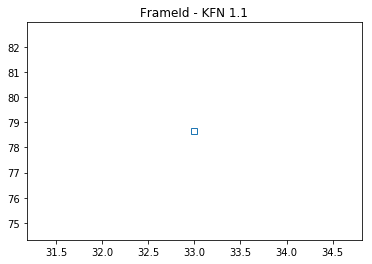

In [6]:
plt.title('FrameId - KFN 1.1')
plt.plot(epochs, ko_result[1], '-s', MarkerFaceColor='white')
plt.show()

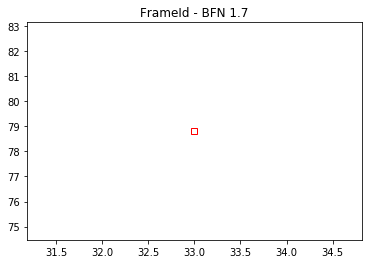

In [7]:
plt.title('FrameId - BFN 1.7')
plt.plot(epochs, en_result[1], '-rs', MarkerFaceColor='white')
plt.show()

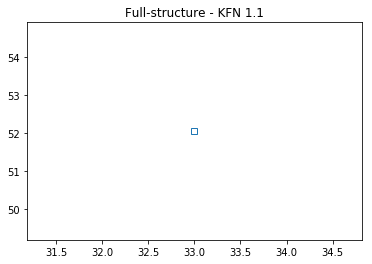

In [8]:
plt.title('Full-structure - KFN 1.1')
plt.plot(epochs, ko_result[2], '-s', MarkerFaceColor='white')
plt.show()

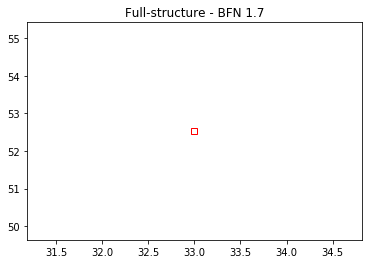

In [9]:
plt.title('Full-structure - BFN 1.7')
plt.plot(epochs, en_result[2], '-rs', MarkerFaceColor='white')
plt.show()

In [10]:
for i in range(len(epochs)):
    epoch = epochs[i]
    fid = ko_result[1][i]
    full = ko_result[2][i]
    print(epoch, fid, full)

33 78.64999999999999 52.059999999999995


In [11]:
for i in range(len(epochs)):
    epoch = epochs[i]
    fid = en_result[1][i]
    full = en_result[2][i]
    print(epoch, fid, full)

33 78.81 52.53
